# Deep Learning
## HW1 - Problem 1 - Recommender System (100 + 20 pts)

### Please fill this part


1.   Full Name: Amin Kashiri
2.   Student Number: 97101026


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc

# from google.colab import drive
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
from math import sqrt


from sklearn.metrics import mean_squared_error

%matplotlib inline

sns.set(style="whitegrid", palette="muted", font_scale=1.3)

rcParams["figure.figsize"] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [2]:
# Change the address as you wish
plays = pd.read_csv("./data/user_artists.dat", sep="\t")
artists = pd.read_csv("./data/artists.dat", sep="\t", usecols=["id", "name"])

# Preprocessing (20 pts)

In [3]:
###############################################################################
## TODO: merge two DataSets in a way that below DataFrame is created         ##
###############################################################################

ap = pd.merge(plays, artists, how="left", left_on="artistID", right_on="id")
ap: pd.DataFrame = ap.sort_values(by=["id", "userID"])
ap

,userID,artistID,weight,id,name
1550,34,1,212,1,MALICE MIZER
12611,274,1,483,1,MALICE MIZER
35861,785,1,76,1,MALICE MIZER
6415,135,2,1021,2,Diary of Dreams
11847,257,2,152,2,Diary of Dreams
...,...,...,...,...,...
20914,454,18741,301,18741,Diamanda Galás
20915,454,18742,294,18742,Aya RL
20916,454,18743,287,18743,Coptic Rain
20917,454,18744,286,18744,Oz Alchemist


In [7]:
ap  # I ran accidentally but it is same :)

,userID,artistID,weight,id,name
1550,34,1,212,1,MALICE MIZER
12611,274,1,483,1,MALICE MIZER
35861,785,1,76,1,MALICE MIZER
6415,135,2,1021,2,Diary of Dreams
11847,257,2,152,2,Diary of Dreams
...,...,...,...,...,...
20914,454,18741,301,18741,Diamanda Galás
20915,454,18742,294,18742,Aya RL
20916,454,18743,287,18743,Coptic Rain
20917,454,18744,286,18744,Oz Alchemist


In [4]:
###############################################################################
## TODO: rename the weight columns to PlayCount         ##
###############################################################################
ap = ap.rename(columns={"weight": "playCount"})

In [5]:
###############################################################################
## TODO: Delete the "id" columns and reset_indexes of ap                     ##
###############################################################################

ap = ap.drop("id", axis=1).reset_index(drop=True)
ap
# TODO

,userID,artistID,playCount,name
0,34,1,212,MALICE MIZER
1,274,1,483,MALICE MIZER
2,785,1,76,MALICE MIZER
3,135,2,1021,Diary of Dreams
4,257,2,152,Diary of Dreams
...,...,...,...,...
92829,454,18741,301,Diamanda Galás
92830,454,18742,294,Aya RL
92831,454,18743,287,Coptic Rain
92832,454,18744,286,Oz Alchemist


In [6]:
# df = ap.groupby(by="userID").agg(totalArtistsListened=pd.NamedAgg("artistID","count"))
# df.head()
# df["avgUserPlays"] = df["totalArtistPlays"] / df["totalUniqueUsers"]

In [6]:
###############################################################################
## TODO: Create  a Dataframe like below where "totalUniqueUsers" is the number of
## userID's assigned to each name in "ap" dataframe.
## "totalArtistPlays" is sum of all playcounts assigned to an artist
## and sort the Frame in descending order of "totalArtistPlays" (highest "totalArtistPlays" at top of table)
## and "avgUserPlays" is divison of "totalArtistPlays" by "totalUniqueUsers"
###############################################################################


artist_rank = (
    ap.groupby(by="name")
    .agg(
        totalUniqueUsers=pd.NamedAgg("playCount", "count"),
        totalArtistPlays=pd.NamedAgg("playCount", "sum"),
    )
    .sort_values("totalArtistPlays", ascending=False)
)
artist_rank["avgUserPlays"] = (
    artist_rank["totalArtistPlays"] / artist_rank["totalUniqueUsers"]
)


artist_rank

,totalUniqueUsers,totalArtistPlays,avgUserPlays
name,,,
Britney Spears,522,2393140,4584.559387
Depeche Mode,282,1301308,4614.567376
Lady Gaga,611,1291387,2113.563011
Christina Aguilera,407,1058405,2600.503686
Paramore,399,963449,2414.659148
...,...,...,...
Morris,1,1,1.000000
Eddie Kendricks,1,1,1.000000
Excess Pressure,1,1,1.000000


In [8]:
artist_rank

,totalUniqueUsers,totalArtistPlays,avgUserPlays
name,,,
Britney Spears,522,2393140,4584.559387
Depeche Mode,282,1301308,4614.567376
Lady Gaga,611,1291387,2113.563011
Christina Aguilera,407,1058405,2600.503686
Paramore,399,963449,2414.659148
...,...,...,...
Morris,1,1,1.000000
Eddie Kendricks,1,1,1.000000
Excess Pressure,1,1,1.000000


In [7]:
###############################################################################
## TODO: Create  a Dataframe like below where for each name in ap dataframe,
# corresponding row in artist rank is attached to it
###############################################################################

ap = pd.merge(ap, artist_rank, how="left", on="name").sort_values(
    "playCount", ascending=False
)
ap

,userID,artistID,playCount,name,totalUniqueUsers,totalArtistPlays,avgUserPlays
2800,1642,72,352698,Depeche Mode,282,1301308,4614.567376
35843,2071,792,324663,Thalía,26,350035,13462.884615
27302,1094,511,320725,U2,185,493024,2664.994595
8152,1905,203,257978,Blur,114,318221,2791.412281
26670,1664,498,227829,Paramore,399,963449,2414.659148
...,...,...,...,...,...,...,...
38688,1810,913,1,Destiny's Child,83,34746,418.626506
32955,1290,697,1,Sia,56,27597,492.803571
71811,510,4988,1,Chris Spheeris,5,3106,621.200000
91319,1851,17080,1,Haylie Duff,1,1,1.000000


In [ ]:
ap.head(20)

,id,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays
2800,72,Depeche Mode,1642,72,352698,282,1301308,4614.567376
35843,792,Thalía,2071,792,324663,26,350035,13462.884615
27302,511,U2,1094,511,320725,185,493024,2664.994595
8152,203,Blur,1905,203,257978,114,318221,2791.412281
26670,498,Paramore,1664,498,227829,399,963449,2414.659148
21191,378,Evanescence,1146,378,203165,226,513476,2272.017699
14165,292,Christina Aguilera,514,292,176133,407,1058405,2600.503686
33309,701,Shakira,1983,701,172496,319,688529,2158.398119
33127,701,Shakira,757,701,169596,319,688529,2158.398119
31835,679,Glee Cast,1086,679,165902,249,506453,2033.947791


# Exploration

In [8]:
def bar_chart_int(x, y, x_label, y_label, title, caption, total_val):
    fig, ax = plt.subplots()
    fig.set_size_inches(16, 5)
    ax = sns.barplot(x[:20], y[:20], palette="Blues_r")
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.get_yaxis().set_major_formatter(
        ticker.FuncFormatter(lambda x, p: "{:,}".format(int(x)))
    )

    # our bar label placement
    for p in ax.patches:
        height = p.get_height()
        pct = 100 * (height / total_val)
        ax.text(
            p.get_x() + p.get_width() / 2.0,
            height + 3,
            "{:1.1f}%".format(pct),
            ha="center",
            verticalalignment="bottom",
            color="black",
            fontsize=12,
        )

    # our caption statement
    ax.text(19, max(y[:20]) * 0.95, caption, horizontalalignment="right")

    plt.xticks(rotation=90)
    plt.show();

/home/amin/amin/University/Term9/Deep/HWs/HW1/DL_HW1/.venv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


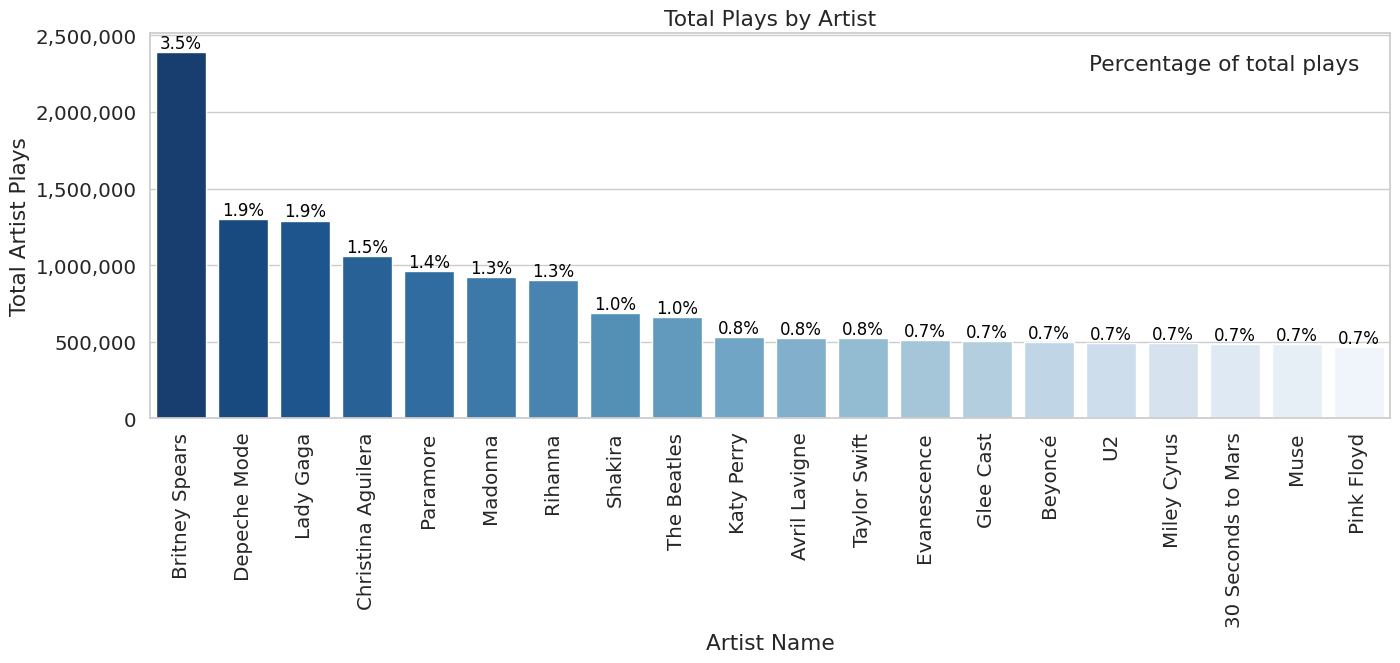

In [9]:
# NOTE: seaborn v0.11.2 is needed. Error with 0.12.1
c1 = artist_rank
x = c1.index
y = c1.totalArtistPlays
x_label = "Artist Name"
y_label = "Total Artist Plays"
title = "Total Plays by Artist"
caption = "Percentage of total plays"
total_val = c1.totalArtistPlays.sum()

bar_chart_int(x, y, x_label, y_label, title, caption, total_val);

/home/amin/amin/University/Term9/Deep/HWs/HW1/DL_HW1/.venv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


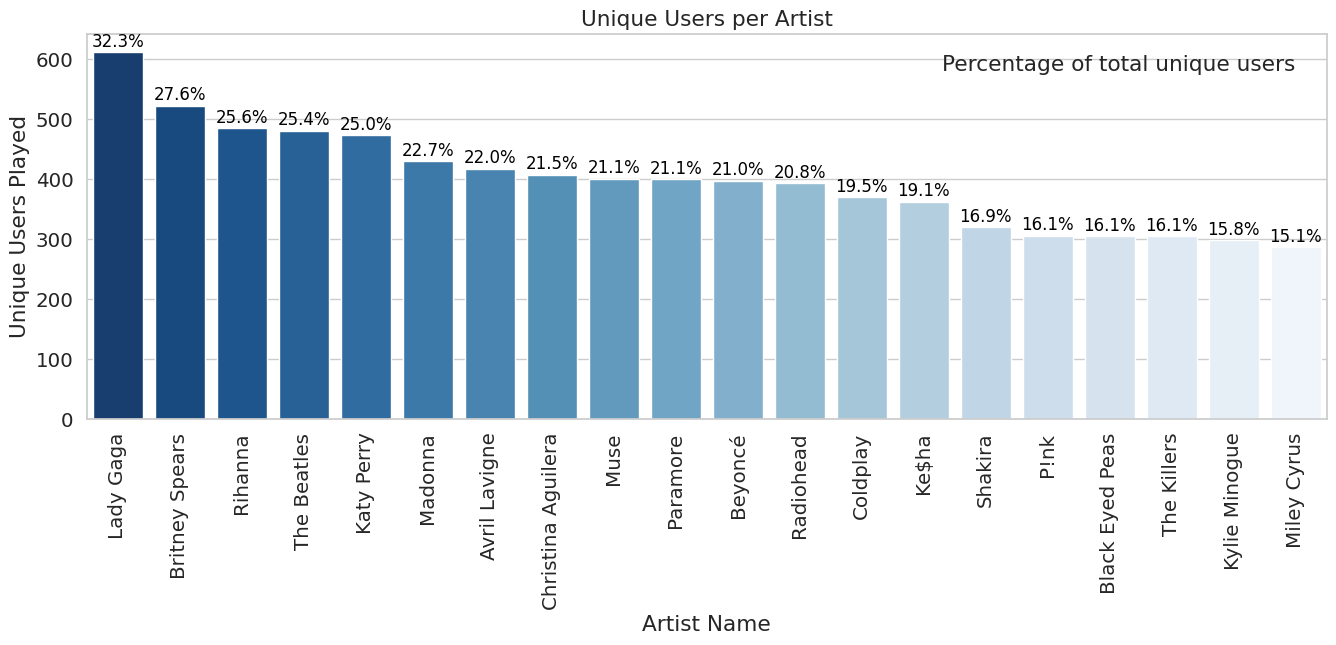

In [14]:
c2 = artist_rank.sort_values(["totalUniqueUsers"], ascending=False)
x = c2.index
y = c2.totalUniqueUsers
x_label = "Artist Name"
y_label = "Unique Users Played"
title = "Unique Users per Artist"
caption = "Percentage of total unique users"
total_val = ap.userID.nunique()

bar_chart_int(x, y, x_label, y_label, title, caption, total_val)

/home/amin/amin/University/Term9/Deep/HWs/HW1/DL_HW1/.venv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


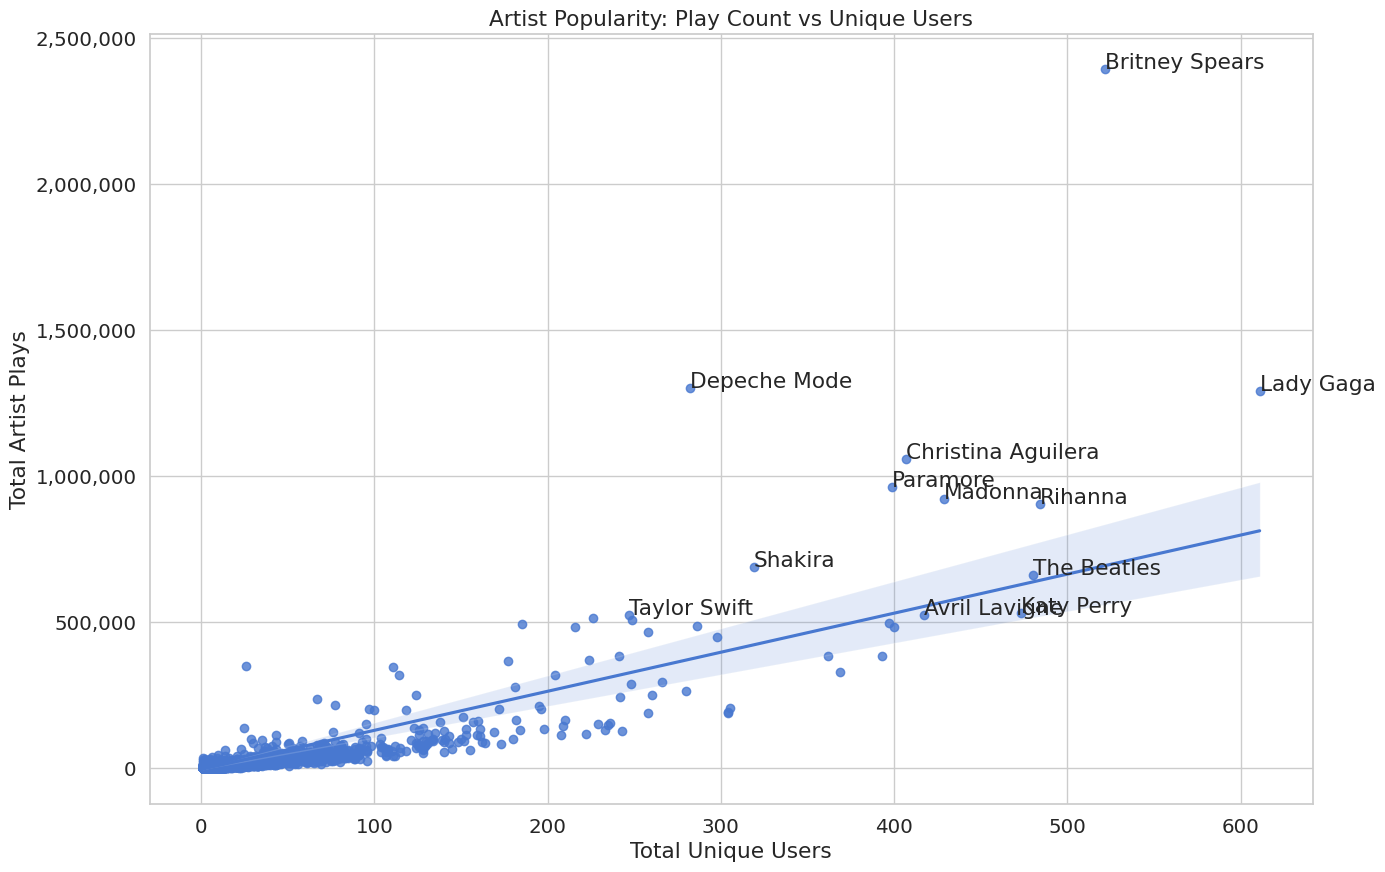

In [15]:
# top_artists =  # TODO : index of top 12 items in "artist_rank" based on their "totalArtistPlays"
top_artists = artist_rank.sort_values("totalArtistPlays", ascending=False)[:12].index

# x = # TODO : "totalUniqueUsers" of "artist_rank"
x = artist_rank.totalUniqueUsers
# y =  # TODO :  "totalArtistPlays" of "artist_rank"
y = artist_rank.totalArtistPlays
# labels =  # TODO : index of "artist_rank"
labels = artist_rank.index

fig, ax = plt.subplots(figsize=(15, 10))
sns.regplot(x, y)
ax.set_title("Artist Popularity: Play Count vs Unique Users")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: "{:,.0f}".format(y)))
ax.set_xlabel("Total Unique Users")
ax.set_ylabel("Total Artist Plays")

for i, t in enumerate(labels):
    if t in top_artists:
        ax.annotate(t, (x[i], y[i]))

# Preprocessing (30 pts)

In [9]:
pc = ap.playCount
play_count_scaled = (pc - pc.min()) / (pc.max() - pc.min())
ap = ap.assign(playCountScaled=play_count_scaled)
ap

,userID,artistID,playCount,name,totalUniqueUsers,totalArtistPlays,avgUserPlays,playCountScaled
2800,1642,72,352698,Depeche Mode,282,1301308,4614.567376,1.000000
35843,2071,792,324663,Thalía,26,350035,13462.884615,0.920513
27302,1094,511,320725,U2,185,493024,2664.994595,0.909347
8152,1905,203,257978,Blur,114,318221,2791.412281,0.731441
26670,1664,498,227829,Paramore,399,963449,2414.659148,0.645960
...,...,...,...,...,...,...,...,...
38688,1810,913,1,Destiny's Child,83,34746,418.626506,0.000000
32955,1290,697,1,Sia,56,27597,492.803571,0.000000
71811,510,4988,1,Chris Spheeris,5,3106,621.200000,0.000000
91319,1851,17080,1,Haylie Duff,1,1,1.000000,0.000000


In [10]:
###############################################################################
## TODO: Create  a Dataframe with userID as its rows, artistID as its columns and
## "play_count_scaled" as the value of each cell, in this manner you're creating
## a table which demonstrates what rating each user has for a set of items(artists)
## Your created table should be like below example
###############################################################################


ratings_df = pd.pivot_table(
    ap, index="userID", columns="artistID", values="playCountScaled", aggfunc="sum"
)
ratings_df

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
ratings_df

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
###############################################################################
# TODO: Fill each NaN value with 0 and return a numpy array corresponding modified DataFrame
###############################################################################


ratings: np.array = ratings_df.fillna(0).to_numpy()
ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00115397, ..., 0.        , 0.        ,
        0.        ]])

In [12]:
###############################################################################
# TODO : Calculate how sparse your data is (in percent) and print it, meaning
# what fraction of the above table is filled with observed values.
###############################################################################

## Your Code

fraction = np.count_nonzero(ratings) / ratings.size
fraction

## END

0.002763750225421394

# Fitting(Training) Model (50pts)

In [13]:
MIN_USER_RATINGS = 35
DELETE_RATING_COUNT = 15

###############################################################################
# TODO : Complete the below function in way that, getting ratings array, creates
# two same size arrays as train and validation, and for the users in ratings array
# that have at least "MIN_USER_RATINGS" observed ratings, choose "DELETE_RATING_COUNT"
# of these ratings, make them zero in train table and put them in validation table
# return train and validation tables
###############################################################################


def train_test_split(ratings):
    row_mask = np.count_nonzero(ratings, axis=1) > MIN_USER_RATINGS
    train = ratings.copy()
    val = np.zeros(train.shape)

    for i in range(len(ratings)):
        if not row_mask[i]:
            continue

        indexes = np.random.choice(
            np.nonzero(ratings[i])[0], DELETE_RATING_COUNT, replace=False
        )
        val[i][indexes] = train[i][indexes]
        train[i][indexes] = 0

    return train, val

In [14]:
train, val = train_test_split(ratings)

In [17]:
###############################################################################
# TODO : Complete below function in a way to return sqrt value of "mean_squared_error"
# between non-zero(observed) values of ground_truth and prediction. Note that you sould
# care about observed values of ground_truth table not prediction!
###############################################################################


def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth != 0]
    ground_truth = ground_truth[ground_truth != 0]
    return sqrt(mean_squared_error(prediction, ground_truth))



In [17]:
a = np.zeros((4, 4))

a[1, 1] = 1
a[1, 2] = 2
a[3, 1] = 5
a[2, 2] = 5
a[3, 1] = 5
np.argwhere(a != 0)

array([[1, 1],
       [1, 2],
       [2, 2],
       [3, 1]])

In [32]:
class Recommender:
    def __init__(
        self, n_epochs=200, n_latent_features=3, lmbda=0.1, learning_rate=0.001
    ):
        self.n_epochs = n_epochs
        self.n_latent_features = n_latent_features
        self.lmbda = lmbda
        self.learning_rate = learning_rate

    def predictions(self, P, Q):
        return np.dot(P, Q.transpose())

    def SGD(self, e, mask):
        P_final = self.P.copy()
        Q_final = self.Q.copy()
        for u, i in mask:
            P_final[u] = P_final[u] + self.learning_rate * (
                e[u, i] * self.Q[i] - self.lmbda * self.P[u]
            )
            Q_final[i] = Q_final[i] + self.learning_rate * (
                e[u, i] * self.P[u] - self.lmbda * self.Q[i]
            )
        self.P = P_final
        self.Q = Q_final

    def fit(self, X_train, X_val):
        self.user_count, self.artist_count = X_train.shape
        self.P = np.random.normal(size=(self.user_count, self.n_latent_features))
        self.Q = np.random.normal(size=(self.artist_count, self.n_latent_features))

        self.train_losses = []
        self.val_losses = []

        for epoch in range(self.n_epochs):
            print("------------------------- epoch: ", epoch)
            mask = np.argwhere(X_train != 0)
            predictions = self.predictions(self.P, self.Q)
            e = X_train - predictions
            self.SGD(e, mask)
            train_loss = rmse(predictions, X_train)
            val_loss = rmse(predictions, X_val)
            self.train_losses.append(train_loss)
            self.val_losses.append(val_loss)
            print("Train loss: ", train_loss)
            print("Val loss: ", val_loss)
        return self

    def predict(self, X_train, user_index):
        # TODO : return predicted ratings for unobserved values of specific user index
        user_ratings = X_train[user_index]
        not_rated = np.where(user_ratings == 0)[0]
        return self.predictions(self.P[user_index], self.Q)[not_rated]

In [ ]:
# creating recommender object
recommender = Recommender().fit(train, val)

In [31]:
saved_P = recommender.P.copy()
saved_Q = recommender.Q.copy()

In [34]:
recommender = Recommender()
recommender.P = saved_P.copy()
recommender.Q = saved_Q.copy()

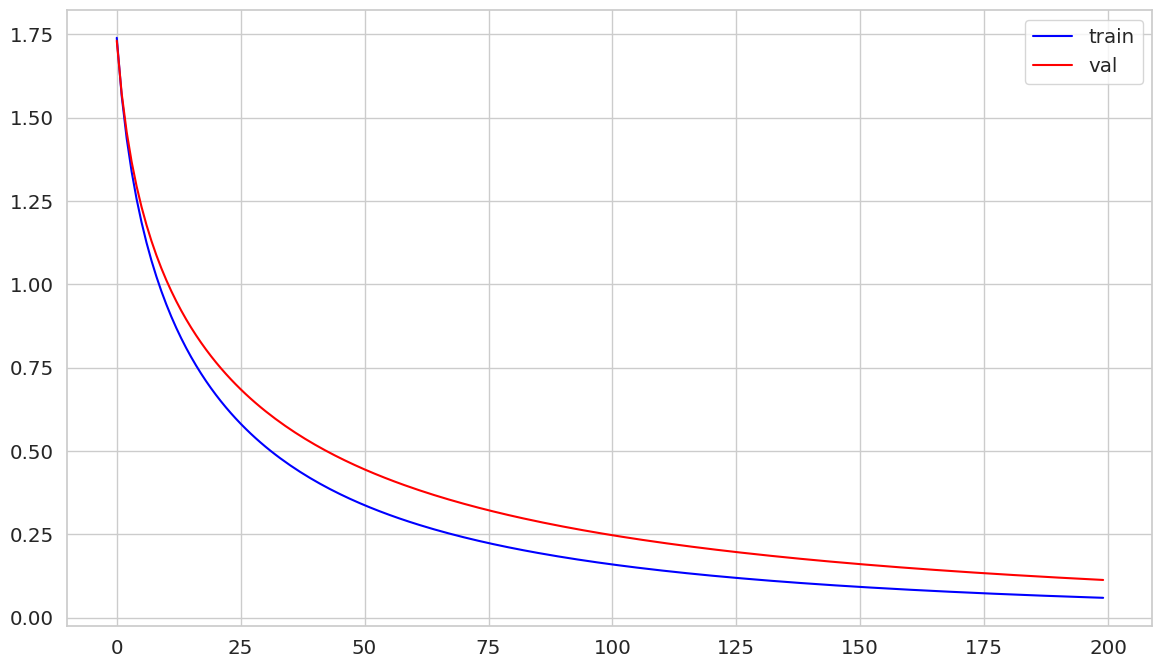

In [30]:
###############################################################################
# TODO : Plot the loss of train and loss
###############################################################################

plt.plot(range(recommender.n_epochs), recommender.train_losses, color="blue")
plt.plot(range(recommender.n_epochs), recommender.val_losses, color="red")
plt.legend(["train", "val"])

# Bonus
**Can you improve the accuracy of model? If so, Do it and explain why it imporved! (Note that improvement must be noticable) (+10 pts)**

# Making recommendations

In [36]:
user_id = 1236
user_index = ratings_df.index.get_loc(user_id)
predictions_index = np.where(train[user_index, :] == 0)[0]

rating_predictions = recommender.predict(train, user_index)
rating_predictions

array([ 0.02273738, -0.00455162, -0.02326417, ..., -0.07812249,
       -0.02773986, -0.00033434])

In [37]:
def create_artist_ratings(artists_df, artists_index, ratings, n=10):
    artist_ids = ratings_df.columns[artists_index]
    artist_ratings = pd.DataFrame(data=dict(artistId=artist_ids, rating=ratings))
    top_n_artists = artist_ratings.sort_values("rating", ascending=False).head(n)

    artist_recommendations = artists_df[
        artists_df.id.isin(top_n_artists.artistId)
    ].reset_index(drop=True)
    artist_recommendations["rating"] = pd.Series(top_n_artists.rating.values)
    return artist_recommendations.sort_values("rating", ascending=False)

In [38]:
existing_ratings_index = np.where(train[user_index, :] > 0)[0]
existing_ratings = train[user_index, existing_ratings_index]

create_artist_ratings(artists, existing_ratings_index, existing_ratings)

,id,name,rating
0,7,Marilyn Manson,0.196486
1,472,3 Doors Down,0.043204
2,614,Pearl Jam,0.042016
3,923,Children of Bodom,0.025657
4,978,Disturbed,0.021690
5,1104,Rammstein,0.021562
6,1118,A Perfect Circle,0.020879
7,2172,Gojira,0.017051
8,6257,Rob Zombie,0.016280
9,6618,D12,0.010990


In [39]:
# Your Systems Recommendation for specific user_id on its unobserved ratings:
create_artist_ratings(artists, predictions_index, rating_predictions)

,id,name,rating
0,4323,Fairyland,0.311514
1,7434,The Rocky Horror Picture Show,0.291182
2,8451,Peter Soleimanipour,0.287788
3,9127,art doom,0.283221
4,9186,Novo Tom,0.280345
5,13803,Ira Lee,0.278920
6,16250,2up,0.270392
7,17355,08001,0.269833
8,17755,supercell feat. 初音ミク,0.269833
9,18715,Mr Cooper,0.264741


# Bonus
**Whatever innovation you can the on representing results of your system visually (+5 pts, note that top visualizations in sense of innovation will get the point)**